# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [319]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [320]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [321]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)]
duplicate_id = duplicate["Mouse ID"].unique()
duplicate_id


array(['g989'], dtype=object)

In [322]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_data = combined_data.loc[combined_data["Mouse ID"]=="g989",:]
duplicate_id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [323]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop(combined_data[combined_data["Mouse ID"]=="g989"].index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [324]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [325]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor_volume = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
st_dev_tumor_volume = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

st_err_tumor_volume = []
drug_regimen = clean_df["Drug Regimen"].unique()
drug_regimen = sorted(drug_regimen)

for drug in drug_regimen:
    filter_df = clean_df.loc[clean_df["Drug Regimen"]==drug,:]
    st_error = st.sem(filter_df["Tumor Volume (mm3)"])
    st_err_tumor_volume.append(st_error)


dictionary = {"Mean Tumor Volume":mean_tumor_volume,
              "Median Tumor Volume": median_tumor_volume,
              "Tumor Volume Variance": variance_tumor_volume,
              "Tumor Volume Std. Dev.": st_dev_tumor_volume,
              "Tumor Volume Std. Err.": st_err_tumor_volume}
stats_drug_regimen = pd.DataFrame(dictionary)
stats_drug_regimen.head(10)



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [297]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

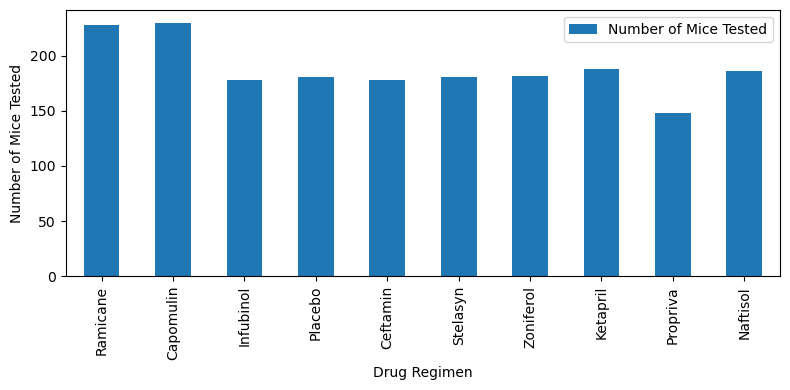

In [326]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_name = clean_df["Drug Regimen"].unique()
number_tests = []

for drug in drug_regimen_name:
    count = clean_df.loc[clean_df["Drug Regimen"]==drug,:]
    count = len(count["Mouse ID"])
    number_tests.append(count)

number_test_df = pd.DataFrame({"Drug Regimen":drug_regimen_name,
                               "Number of Mice Tested":number_tests})

number_test_df = number_test_df.set_index("Drug Regimen")

number_test_df.plot(kind="bar",figsize=(8,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()


<BarContainer object of 10 artists>

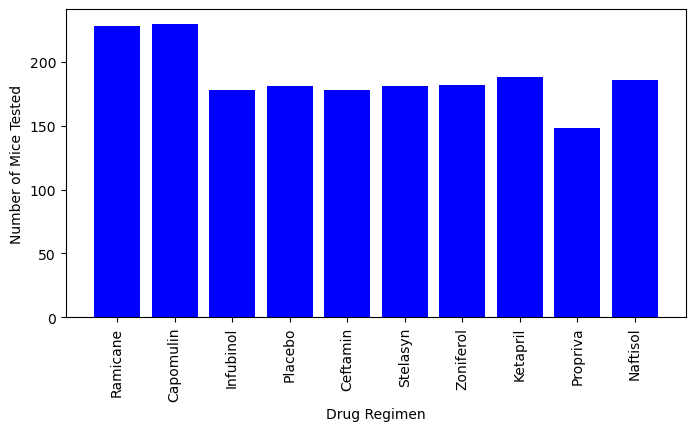

In [299]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen_name = clean_df["Drug Regimen"].unique()
x_axis = range(len(drug_regimen_name))
y_axis = []

for drug in drug_regimen_name:
    count = clean_df.loc[clean_df["Drug Regimen"]==drug,:]
    count = len(count["Mouse ID"])
    y_axis.append(count)
y_axis

plt.figure(figsize=(8,4))
plt.xticks(x_axis,drug_regimen_name,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout
plt.bar(x_axis, y_axis, color ="blue", alpha=1,align="center")


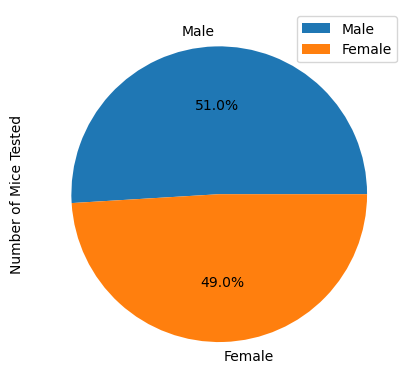

In [327]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df["Sex"].unique()
number_tests = []

for x in sex:
    count = clean_df.loc[clean_df["Sex"]==x,:]
    count = len(count["Mouse ID"])
    number_tests.append(count)

number_test_df = pd.DataFrame({"Sex":sex,
                               "Number of Mice Tested":number_tests})

number_test_df = number_test_df.set_index("Sex")
number_test_df.plot(kind="pie",y="Number of Mice Tested",autopct="%1.1F%%")
plt.show()


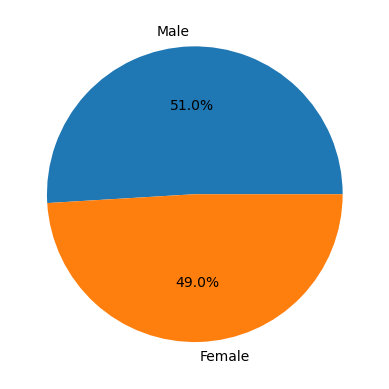

In [330]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df["Sex"].unique()
number_tests = []

for x in sex:
    count = clean_df.loc[clean_df["Sex"]==x,:]
    count = len(count["Mouse ID"])
    number_tests.append(count)

plt.pie(number_tests,labels=sex,autopct="%1.1F%%",shadow=False)
plt.show() 

## Quartiles, Outliers and Boxplots

In [342]:
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
mouse_id_new = []
drug_regimen_new =[]
sex_new = []
age_months_new = []
weight_new =[]
tumor_volume_new =[]

# group the clean_df dataframe by mouse ID
grouped_id = clean_df.groupby("Mouse ID")

# loop through each group and get the row with the highest timepoint
for mouse, group in grouped_id:
    filter_df = group.sort_values("Timepoint", ascending=False)
    mouse_id_new.append(filter_df["Mouse ID"].iloc[0])
    drug_regimen_new.append(filter_df["Drug Regimen"].iloc[0])
    sex_new.append(filter_df["Sex"].iloc[0])
    age_months_new.append(filter_df["Age_months"].iloc[0])
    weight_new.append(filter_df["Weight (g)"].iloc[0])
    tumor_volume_new.append(filter_df["Tumor Volume (mm3)"].iloc[0])

# create a dictionary with the column names and lists
new_dict = {
    "Mouse ID": mouse_id_new,
    "Drug Regimen": drug_regimen_new,
    "Sex": sex_new,
    "Age_months": age_months_new,
    "Weight (g)": weight_new,
    "Tumor Volume (mm3)": tumor_volume_new
}

# create the final dataframe using the dictionary
final_volume_df = pd.DataFrame(new_dict)
final_volume_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,67.973419
1,a251,Infubinol,Female,21,25,65.525743
2,a262,Placebo,Female,17,29,70.717621
3,a275,Ceftamin,Female,20,28,62.999356
4,a366,Stelasyn,Female,16,29,63.440686


In [344]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
mouse_id_new = []
drug_regimen_new =[]
sex_new = []
age_months_new = []
weight_new =[]
tumor_volume_new =[]

# group the clean_df dataframe by mouse ID
grouped_id = clean_df.groupby("Mouse ID")

# loop through each group and get the row with the highest timepoint
for mouse, group in grouped_id:
    filter_df = group.sort_values("Timepoint", ascending=False)
    mouse_id_new.append(filter_df["Mouse ID"].iloc[0])
    drug_regimen_new.append(filter_df["Drug Regimen"].iloc[0])
    sex_new.append(filter_df["Sex"].iloc[0])
    age_months_new.append(filter_df["Age_months"].iloc[0])
    weight_new.append(filter_df["Weight (g)"].iloc[0])
    tumor_volume_new.append(filter_df["Tumor Volume (mm3)"].iloc[0])

# create a dictionary with the column names and lists
new_dict = {
    "Mouse ID": mouse_id_new,
    "Drug Regimen": drug_regimen_new,
    "Sex": sex_new,
    "Age_months": age_months_new,
    "Weight (g)": weight_new,
    "Tumor Volume (mm3)": tumor_volume_new
}

# create the final dataframe using the dictionary
final_volume_df = pd.DataFrame(new_dict)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

for treatment in treatments:
    quartiles = final_volume_df.loc[final_volume_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume_df.loc[(final_volume_df["Drug Regimen"] == treatment) & ((final_volume_df["Tumor Volume (mm3)"] < float(lower_bound)) | (final_volume_df["Tumor Volume (mm3)"] > float(upper_bound))), :]
    print("For " + treatment + ": the lower bound is: " + str(round(lower_bound,2)) + " and the upper bound is: " + str(round(upper_bound,2)) + ". The potential outliers: " + str(outliers))

    

For Capomulin: the lower bound is: 20.7 and the upper bound is: 51.83. The potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3)]
Index: []
For Ramicane: the lower bound is: 17.91 and the upper bound is: 54.31. The potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3)]
Index: []
For Infubinol: the lower bound is: 36.83 and the upper bound is: 82.74. The potential outliers:    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Tumor Volume (mm3)
31     c326    Infubinol  Female          18          25           36.321346
For Ceftamin: the lower bound is: 25.36 and the upper bound is: 87.67. The potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3)]
Index: []


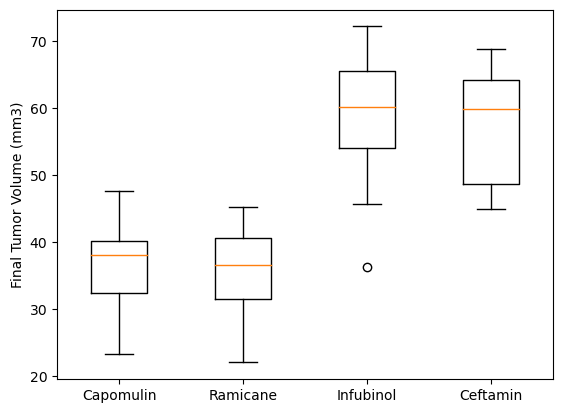

In [345]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

Capomulin = final_volume_df.loc[final_volume_df["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
Ramicane = final_volume_df.loc[final_volume_df["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]
Infubinol = final_volume_df.loc[final_volume_df["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]
Ceftamin = final_volume_df.loc[final_volume_df["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"]
dict_drug = {"Capomulin":Capomulin,
             "Ramicane": Ramicane,
             "Infubinol": Infubinol,
             "Ceftamin": Ceftamin}

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(dict_drug.values())
ax1.set_xticklabels(dict_drug.keys())
plt.show()

## Line and Scatter Plots

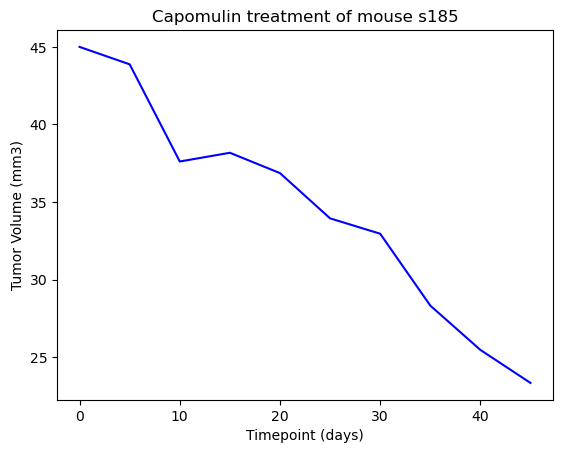

In [346]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = [0,5,10,15,20,25,30,35,40,45]
y_axis = [ ]

for x in x_axis:
    value = clean_df.loc[(clean_df["Mouse ID"]=="s185") & (clean_df["Timepoint"]==x),"Tumor Volume (mm3)"]
    y_axis.append(value)

plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis,y_axis,color="blue")
plt.show()


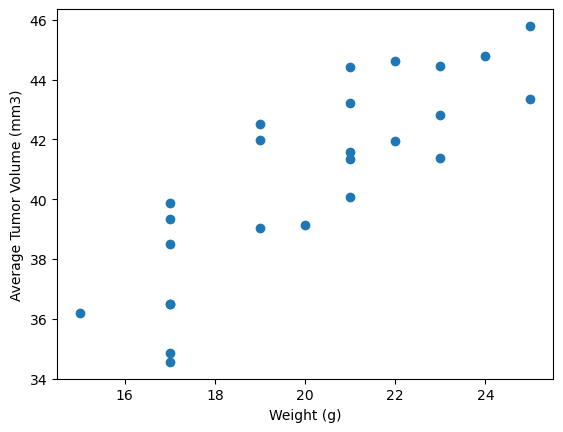

In [347]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = []
y_axis = []
mouse_id = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin","Mouse ID"].unique()

for mouse in mouse_id:
    xvalue = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"]==mouse) & (clean_df["Timepoint"]==0),"Weight (g)"].unique()[0]
    x_axis.append(xvalue)
    yvalue = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"]==mouse),"Tumor Volume (mm3)"].mean()
    y_axis.append(yvalue)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_axis, y_axis, marker="o")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


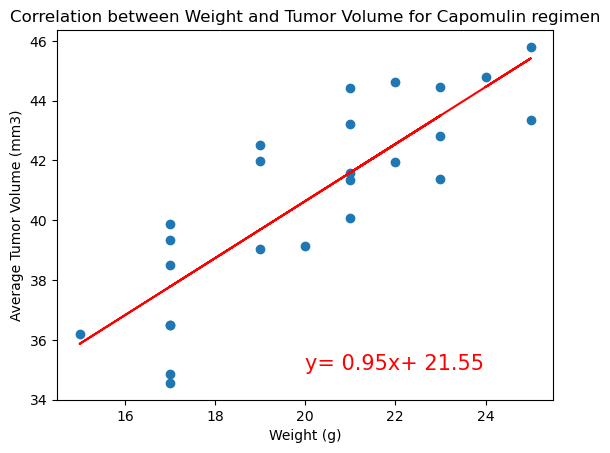

In [348]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_axis = []
y_axis = []
mouse_id = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin","Mouse ID"].unique()

for mouse in mouse_id:
    xvalue = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"]==mouse) & (clean_df["Timepoint"]==0),"Weight (g)"].unique()[0]
    x_axis.append(xvalue)
    yvalue = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"]==mouse),"Tumor Volume (mm3)"].mean()
    y_axis.append(yvalue)


correlation = st.pearsonr(x_axis,y_axis)
corr_coef = correlation[0]
print("The correlation between mouse weight and the average tumor volume is " + str(round(corr_coef,2)))

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_axis,y_axis)

regress_values = np.array(x_axis) * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Correlation between Weight and Tumor Volume for Capomulin regimen")
plt.show()


